# Debdas Ghosh
## deg107@pitt.edu

In [1]:
from scipy.misc import imread, imsave, imresize
#from PIL import Image
from scipy.io import loadmat
from scipy.ndimage import convolve
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter

from skimage.io import imread
from skimage import filters
from scipy import ndimage as ndi
import cv2
from matplotlib.patches import Circle
import math
from scipy.spatial import distance

## Part I: Image Responses with Filters

In [2]:
#img = Image.open('img/cardinal1.jpg').resize((100,100)).convert('LA') #A
#img.save('img/cardinal1_greyscale.png')
cardinal1 = imread('img/cardinal1.jpg')
cardinal2 = imread('img/cardinal2.jpg')
leopard1 = imread('img/leopard1.jpg')
leopard2 = imread('img/leopard2.jpg')
panda1 = imread('img/panda1.jpg')
panda2 = imread('img/panda2.jpg')


cardinal1 = imresize(cardinal1, (100, 100))
cardinal2 = imresize(cardinal2, (100, 100))
leopard1 = imresize(leopard1, (100, 100))
leopard2 = imresize(leopard2, (100, 100))
panda1 = imresize(panda1, (100, 100))
panda2 = imresize(panda2, (100, 100))

cardinal1 = rgb2gray(cardinal1)
cardinal2 = rgb2gray(cardinal2)
leopard1 = rgb2gray(leopard1)
leopard2 = rgb2gray(leopard2)
panda1 = rgb2gray(panda1)
panda2 = rgb2gray(panda2)


C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if sys.path[0] == '':
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  del sys.path[0]
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecate

In [3]:
myFilter = loadmat('filters.mat')

In [4]:
myFilter['F'].shape

(49, 49, 48)

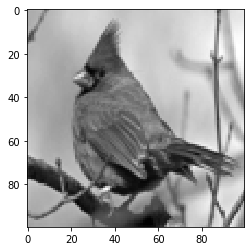

In [5]:
plt.imshow(cardinal1, cmap=plt.cm.gray)
plt.show()

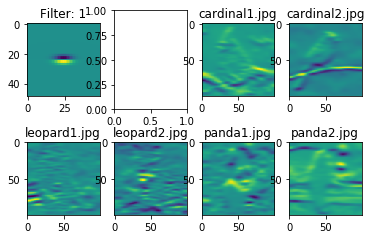

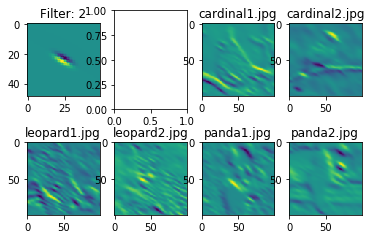

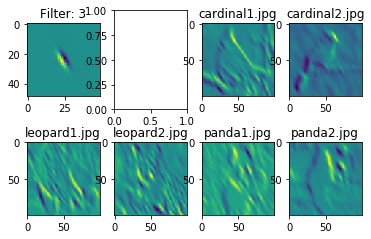

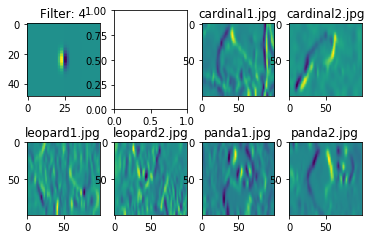

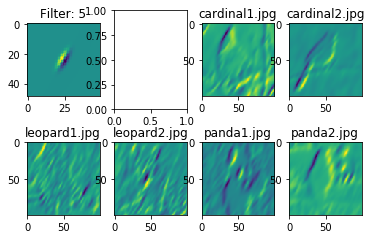

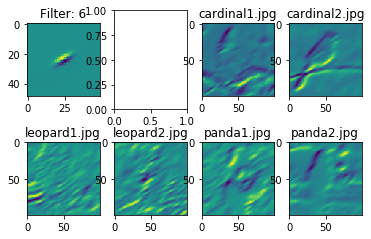

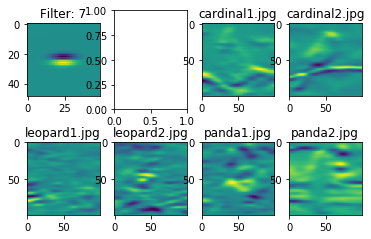

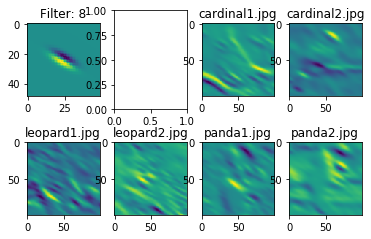

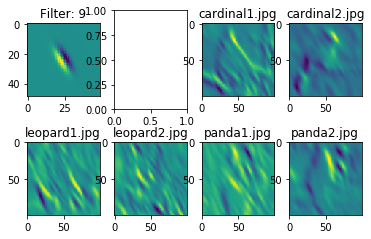

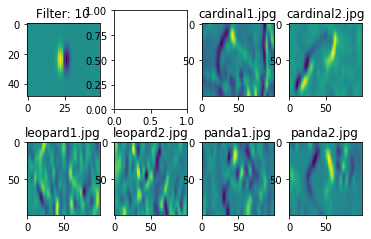

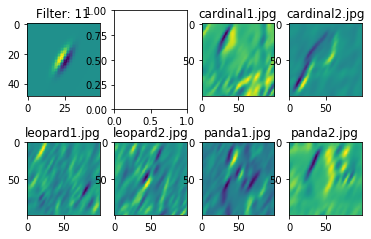

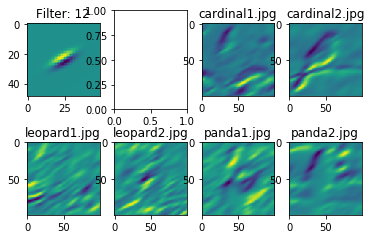

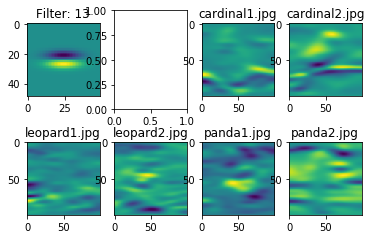

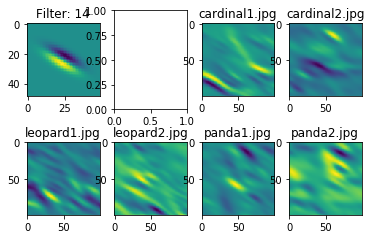

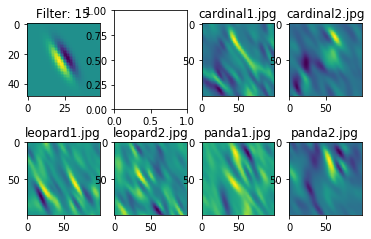

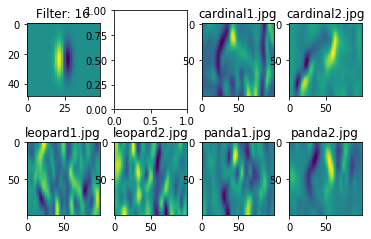

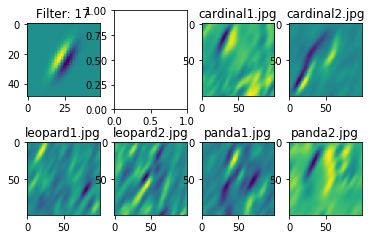

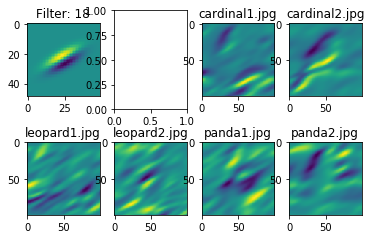

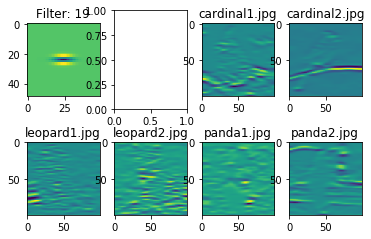

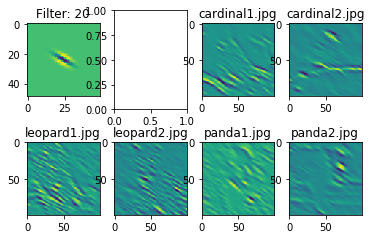

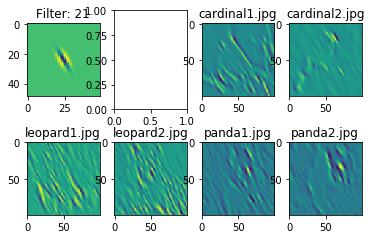

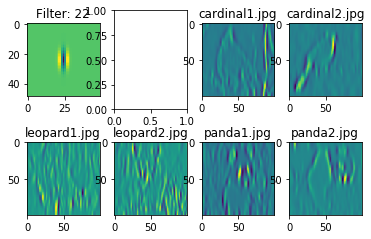

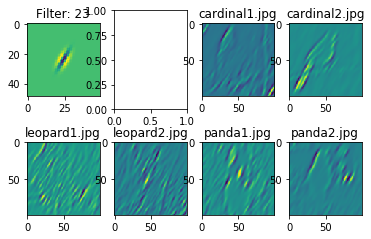

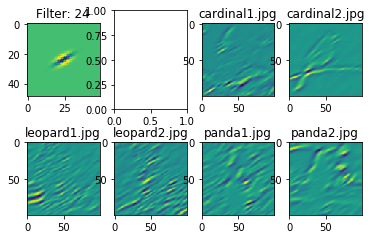

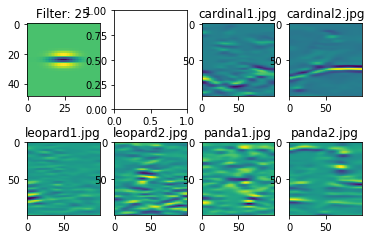

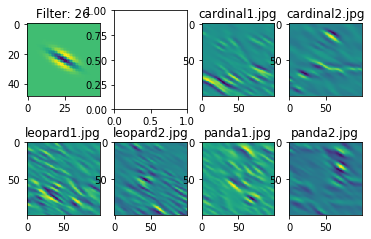

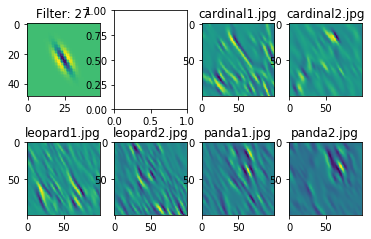

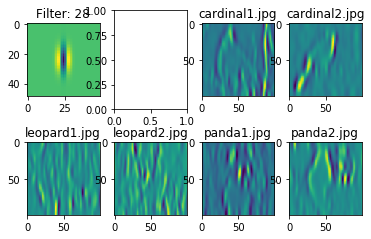

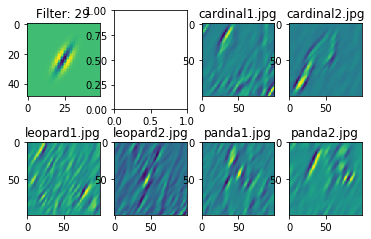

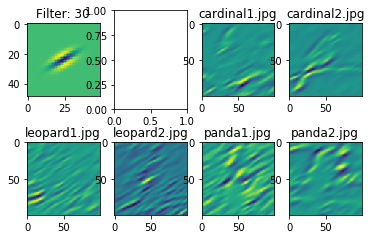

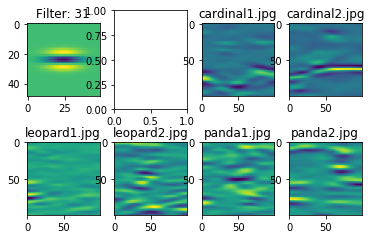

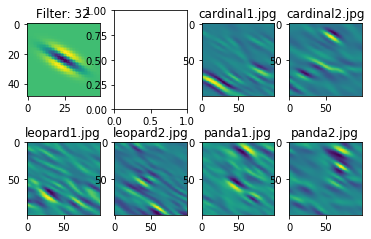

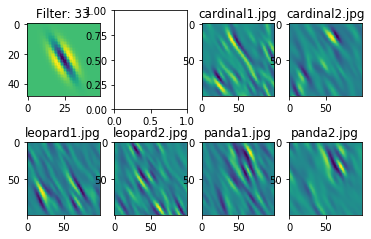

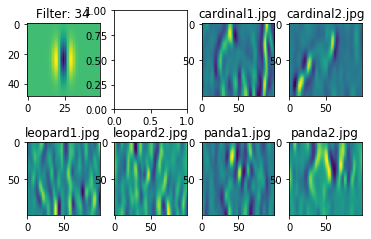

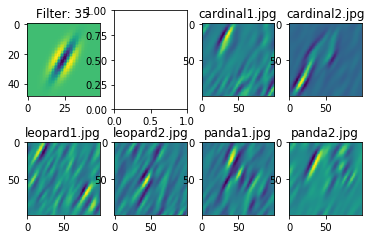

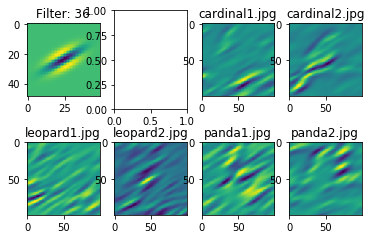

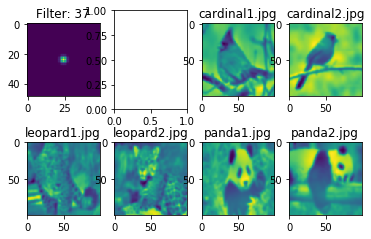

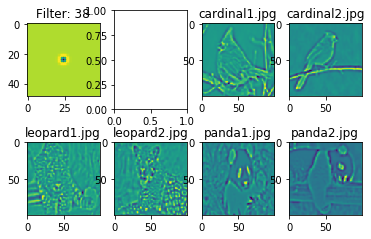

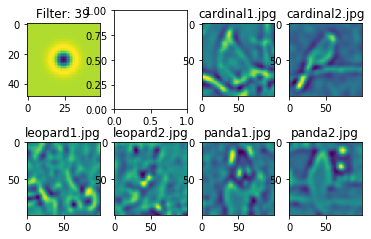

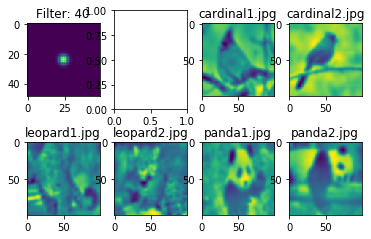

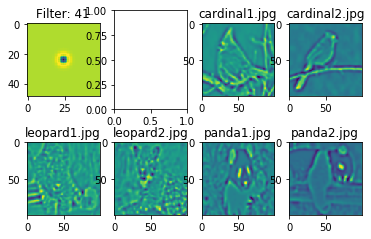

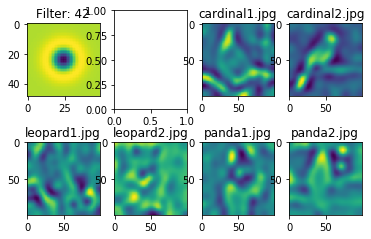

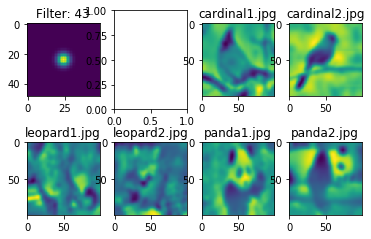

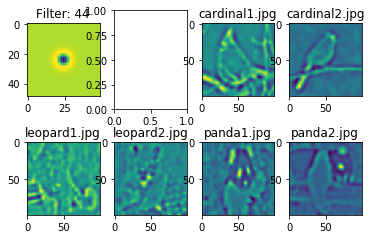

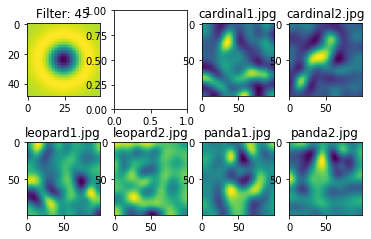

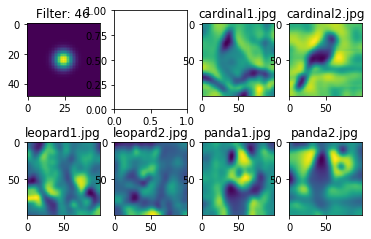

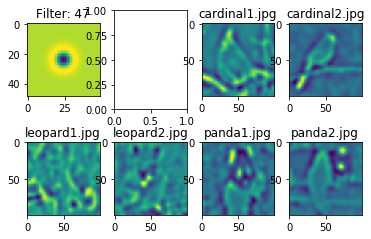

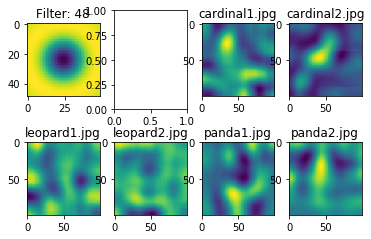

In [50]:
for i in range(myFilter['F'].shape[2]):
    fig, ax = plt.subplots(nrows=2, ncols=4)
    ax[0, 0].set_title("Filter: "+str(i+1))
    ax[0, 0].imshow(myFilter['F'][:,:,i])
    ax[0, 2].set_title("cardinal1.jpg")
    ax[0, 2].imshow(convolve(cardinal1, myFilter['F'][:,:,i]))
    ax[0, 3].set_title("cardinal2.jpg")
    ax[0, 3].imshow(convolve(cardinal2, myFilter['F'][:,:,i]))
    ax[1, 0].set_title("leopard1.jpg")
    ax[1, 0].imshow(convolve(leopard1, myFilter['F'][:,:,i]))
    ax[1, 1].set_title("leopard2.jpg")
    ax[1, 1].imshow(convolve(leopard2, myFilter['F'][:,:,i]))
    ax[1, 2].set_title("panda1.jpg")
    ax[1, 2].imshow(convolve(panda1, myFilter['F'][:,:,i]))
    ax[1, 3].set_title("panda2.jpg")
    ax[1, 3].imshow(convolve(panda2, myFilter['F'][:,:,i]))
    plt.show()

#### Filter #37 : one filter where the responses of images of the same animal are similar, while the responses of images of different animals are quite distinct

#### Filter #35 : one filter where responses of different animals look fairly similar.

## Part II: Image Description with Texture

In [6]:
def computeTextureReprs(image, F):
    num_filters = F.shape[2]
    grey_img = rgb2gray(image)
    responses = [[[0 for col in range(image.shape[1])] for row in range(image.shape[0])] for fil in range(num_filters)]
    for fil in range(num_filters):
        responses[fil] = convolve(grey_img, F[:,:,fil])
    texture_repr_concat = np.squeeze(np.asarray(responses))
    texture_repr_mean = np.mean(responses,axis=(1,2))
    texture_repr_mean = texture_repr_mean.reshape((texture_repr_mean.shape[0],-1))
    #texture_repr_mean = [0 for fil in range(num_filters)]
    #for i in range(len(responses)):
        #texture_repr_mean[i] = responses[i].mean()
    return texture_repr_concat, texture_repr_mean

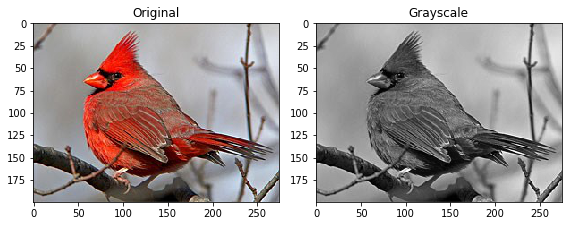

In [14]:
original = imread('img/cardinal1.jpg') #data.astronaut()
#resized = imresize(original, (100, 100))
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [15]:
texture_repr_concat, texture_repr_mean = computeTextureReprs(original, myFilter['F'])

In [16]:
texture_repr_concat.shape

(48, 200, 275)

In [17]:
len(texture_repr_mean)

48

## Part III: Hybrid Images

In [18]:
im1 = imread('img/woman_happy.png')
im2 = imread('img/woman_neutral.png')
im1 = imresize(im1, (512, 512))
im2 = imresize(im2, (512, 512))
im1 = rgb2gray(im1)
im2 = rgb2gray(im2)

C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  after removing the cwd from sys.path.


In [19]:
im1_blur = gaussian_filter(im1, sigma=2)

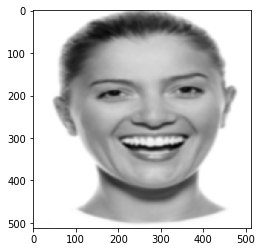

In [20]:
plt.imshow(im1_blur, cmap=plt.cm.gray)
plt.show()

In [21]:
im2_blur = gaussian_filter(im2, sigma=2)

In [22]:
im2_detail = im2 - im2_blur

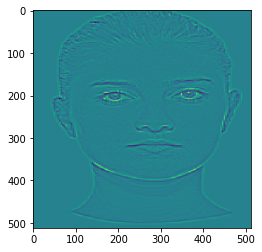

In [23]:
plt.imshow(im2_detail)
plt.show()

In [24]:
hybrid = im1_blur + im2_detail
imsave('img/hybrid.png', hybrid)

C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


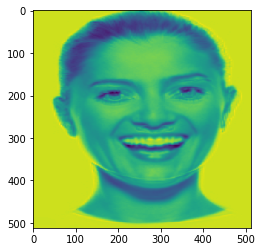

In [25]:
plt.imshow(imread('img/hybrid.png'))
plt.show()

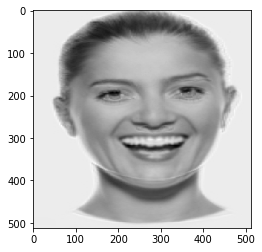

In [26]:
plt.imshow(imread('img/hybrid.png'), cmap=plt.cm.gray)
plt.show()

## Part IV: Feature Detection

In [27]:
def non_maximum_suppression(mat,threshold):
    r_mat = mat
    offset = 1
    height = r_mat.shape[0]
    width = r_mat.shape[1]
    r_val_dict = dict()
    for y in range(offset,height-offset):
        for x in range(offset,width-offset):
            if r_mat[y,x] < threshold or r_mat[y,x]==0:
                continue
                
            xmin = x-offset
            xmax = x+offset+1
            ymin = y-offset
            ymax = y+offset+1
            localMax = np.max(r_mat[ymin:ymax,xmin:xmax])
            if localMax > r_mat[y,x]:
                r_mat[y,x] = 0
            else:
                r_val_dict[(y,x)] = r_mat[y,x]
    return r_val_dict

In [28]:
def extract_keypoints(img,t_percentile=99):

    imgC = img.copy()
    image = rgb2gray(img)
    img = image.copy()
    window_size = 5
    k = 0.05
    Ix = filters.sobel_h(image) 
    Iy = filters.sobel_v(image)
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Iy * Ix
    height = image.shape[0]
    width = image.shape[1]
    half_window_size = window_size//2
    r_mat = np.zeros_like(image,dtype=np.int64)
    r_val_dict = dict()
    for y in range(half_window_size,height-half_window_size):
        for x in range(half_window_size,width-half_window_size):
            m = np.zeros((2,2))
            xmin = x-half_window_size
            xmax = x+half_window_size+1
            ymin = y-half_window_size
            ymax = y+half_window_size+1

            local_Ixx = Ixx[ymin:ymax,xmin:xmax]
            local_Iyy = Iyy[ymin:ymax,xmin:xmax]
            local_Ixy = Ixy[ymin:ymax,xmin:xmax]
            Sxx = local_Ixx.sum()
            Sxy = local_Ixy.sum()
            Syy = local_Iyy.sum()

            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            R = det - k*(trace**2)
            r_mat[y,x] = R
            
    threshold = np.percentile(r_mat,t_percentile)
    r_mat[r_mat<threshold]=0
    r_val_dict = non_maximum_suppression(r_mat,threshold)
    intrestPt = np.asarray([list(x) for x in r_val_dict.keys()])
    scores = np.array(list(r_val_dict.values()))
    return img, r_val_dict, intrestPt[:,0], intrestPt[:,1], scores, Ix, Iy

In [29]:
def extract_keypoints_old(image):    
    k = 0.05
    imggray = rgb2gray(image)
    height, width = imggray.shape
    window_size = 5
    half_window_size = int(window_size/2)
    Ix = filters.sobel_h(imggray) 
    Iy = filters.sobel_v(imggray)
    Ixx = ndi.gaussian_filter(Ix**2, sigma=1)
    Ixy = ndi.gaussian_filter(Iy*Ix, sigma=1)
    Iyy = ndi.gaussian_filter(Iy**2, sigma=1)
    R = np.zeros((image.shape[0], image.shape[1]))
    
    for y in range(half_window_size, height-half_window_size):
        for x in range(half_window_size, width-half_window_size):
            Sxx = np.sum(Ixx[y-half_window_size:y+1+half_window_size, x-half_window_size:x+1+half_window_size])
            Syy = np.sum(Iyy[y-half_window_size:y+1+half_window_size, x-half_window_size:x+1+half_window_size])
            Sxy = np.sum(Ixy[y-half_window_size:y+1+half_window_size, x-half_window_size:x+1+half_window_size])

            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            r = det - k*(trace**2)
            R[y][x] = r
            

    img_copy_for_corners = np.copy(image)
    X = []
    Y = []
    scores = []
    threshold = np.percentile(R,99)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if R[i][j] > threshold:

                if (R[i][j] > R[i+1][j]) and (R[i][j] > R[i-1][j])\
                and (R[i][j] > R[i][j+1]) and (R[i][j] > R[i][j-1])\
                and (R[i][j] > R[i+1][j+1]) and (R[i][j] > R[i-1][j-1])\
                and (R[i][j] > R[i+1][j-1]) and (R[i][j] > R[i-1][j+1]):
                    X.append(j)
                    Y.append(i)
                    scores.append(R[i][j])

                    
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')

    # Show the image
    ax.imshow(image)
    for i in Y:
        for j in X:
            circ = Circle((j,i),R[i][j], fill = False, color = 'blue')
            ax.add_patch(circ)

    # Show the image
    plt.show()

In [31]:
def show_keypoints(pathVal,t_percentile=99,save = False):
    img1 = imread(pathVal)
    newimg,keypoints,intrestPt1, intrestPt2, scores, Ix, Iy = extract_keypoints(img1,t_percentile)
    #print("total number of points are", len(keypoints))
    blue = (0,0,255)
    newimgC = img1.copy()
    for k,v in keypoints.items():
        a,b =k
        cv2.circle(newimgC,(b,a),v * 3,blue)
    plt.imshow(newimgC)
    

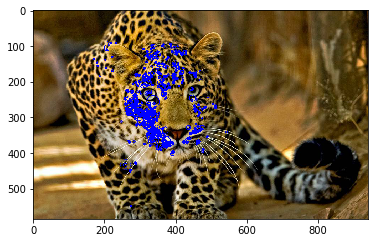

In [32]:
show_keypoints('img/leopard1.jpg')

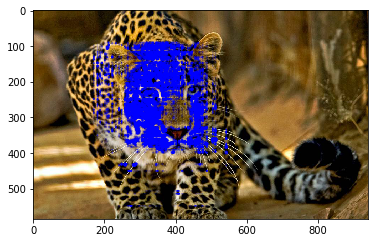

In [11]:
extract_keypoints_old(imread('img/leopard1.jpg'))

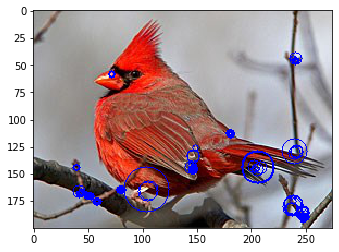

In [33]:
show_keypoints('img/cardinal1.jpg')

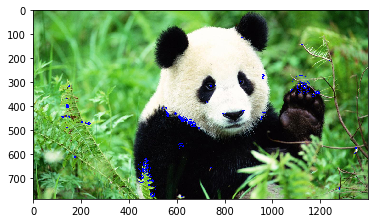

In [34]:
show_keypoints('img/panda1.jpg')

## Part V: Feature Description

In [35]:
def compute_features(keypoints_dict,PX,PY,RScore,Ix,Iy):
    
    features = dict()
    maxSize =  Iy.shape[1]
    bins = [[-90,-67.5],[-67.5,-45],[-45,-22.5],[-22.5,0],[0,22.5],[22.5,45],[45,67.5],[67.5,90]]
    for index,(key,val) in enumerate(keypoints_dict.items()):

        pointX,pointY = key

        if ((pointX - 5) < 0 or (pointX + 5) > (maxSize-2) or (pointY - 5) < 0 or (pointY + 5) > (maxSize-2)):
            continue

        a = Ix[pointX-5:pointX+6,pointY-5:pointY+6] # L[x+1][y] - L[x-1][y]
        b = Iy[pointX-5:pointX+6,pointY-5:pointY+6] # L[x][y+1] - L[x][y-1]

        m = np.sqrt(np.square(a)+np.square(b))
        tanInv = np.arctan(b/a)
        theta = tanInv * 180 / np.pi

        mflat = m.flatten()
        tflat = theta.flatten()

        
        singleNormalized = np.zeros((8))
        for ii in range(mflat.shape[0]):
            if mflat[ii] <0.01:
                continue
            for i, bin_val in enumerate(bins):
                    if (tflat[ii] >= bin_val[0]) and (tflat[ii] < bin_val[1]) and (tflat[ii] != 0):
                        singleNormalized[i]+=mflat[ii]

        clippedSingleNormalized = singleNormalized.copy()/np.sum(singleNormalized)
        clippedSingleNormalized = np.clip(clippedSingleNormalized,0,0.2)
        normClipNorm = clippedSingleNormalized.copy()/np.sum(clippedSingleNormalized)
        features[key] = normClipNorm.copy()

    return features


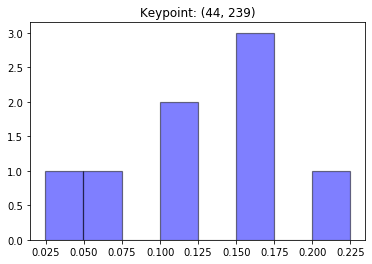

[0.15821548 0.17215128 0.0514482  0.0246423  0.10281717 0.15425314
 0.11184843 0.224624  ]


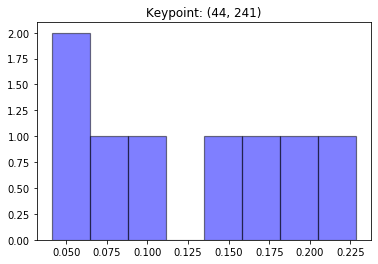

[0.09643701 0.07448375 0.04256587 0.04107688 0.15132895 0.16461556
 0.20094336 0.22854862]


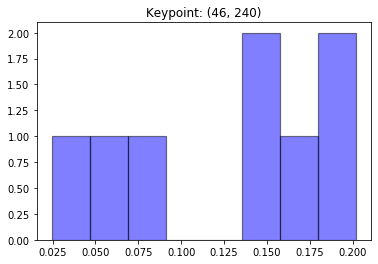

[0.1942679  0.08456792 0.0514765  0.02454159 0.1363725  0.14893601
 0.15785321 0.20198437]


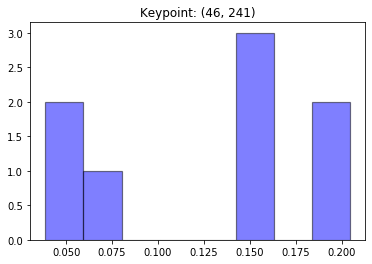

[0.1535594  0.06562417 0.03896514 0.0387045  0.14889947 0.15628198
 0.19357559 0.20438975]


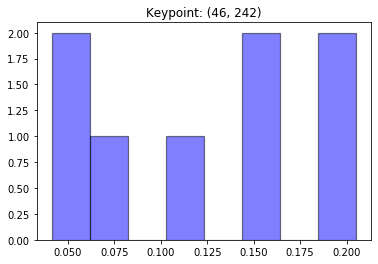

[0.1215687  0.06736509 0.04785216 0.04142105 0.16035451 0.1512239
 0.20510729 0.20510729]


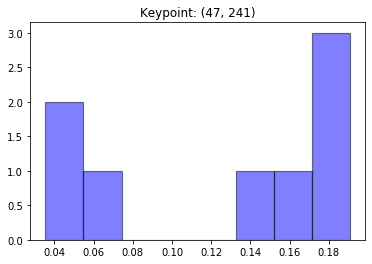

[0.18729144 0.06833608 0.03971376 0.03536637 0.14407533 0.15255401
 0.19076176 0.18190124]


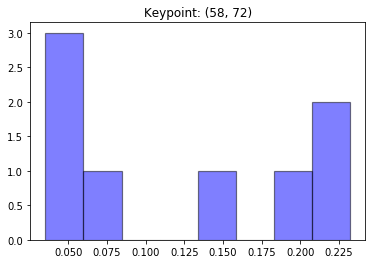

[0.04107588 0.05981043 0.18582269 0.03526225 0.2319206  0.2319206
 0.15390319 0.06028436]


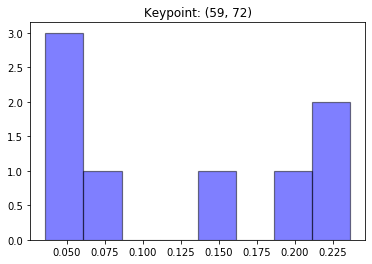

[0.0358849  0.04804587 0.19483777 0.07389267 0.23603227 0.23603227
 0.13759986 0.03767437]


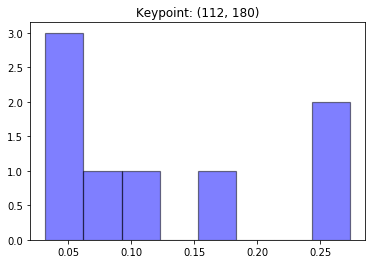

[0.07022083 0.27338651 0.27338651 0.16212008 0.10810869 0.04326884
 0.03212147 0.03738707]


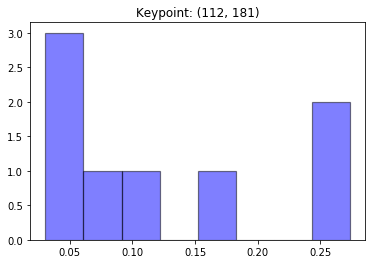

[0.07108598 0.27339403 0.27339403 0.16411745 0.10049794 0.04905391
 0.03060897 0.03784769]


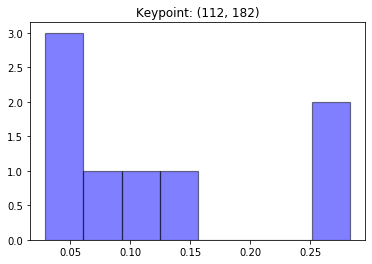

[0.07365515 0.28281333 0.28281333 0.1431096  0.10487624 0.047725
 0.02936528 0.03564207]


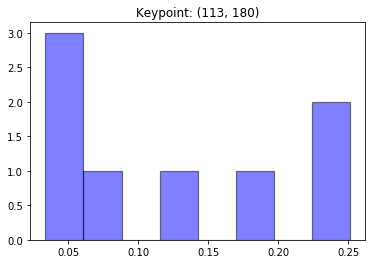

[0.0708746  0.25092716 0.25092716 0.17717736 0.1415216  0.03886616
 0.0361231  0.03358286]


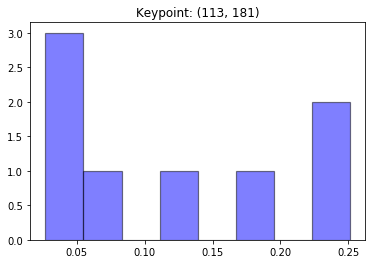

[0.07142583 0.25116156 0.25116156 0.17855536 0.13462558 0.05239634
 0.02682972 0.03384405]


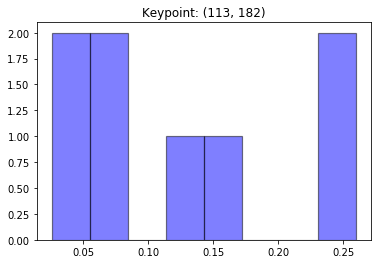

[0.07445881 0.25999031 0.25999031 0.16190083 0.13051428 0.05522442
 0.02585482 0.0320662 ]


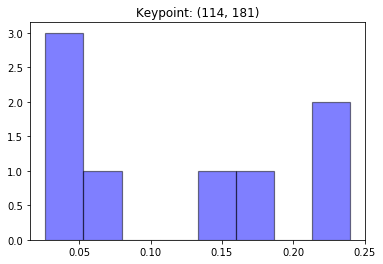

[0.07889325 0.23954189 0.23954189 0.17932667 0.13450452 0.05156467
 0.02640386 0.05022325]


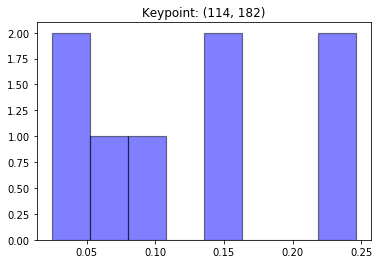

[0.08116893 0.24633107 0.24633107 0.16095907 0.13843367 0.05363788
 0.02458898 0.04854932]


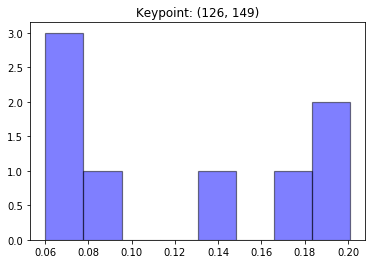

[0.18284981 0.19801174 0.2008401  0.13704935 0.07673496 0.08245121
 0.06188728 0.06017554]


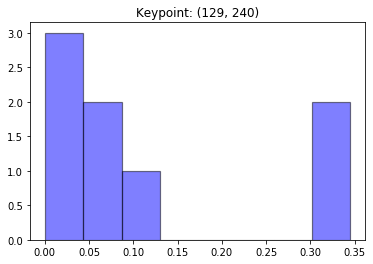

[0.344399   0.08097389 0.06177035 0.344399   0.09163502 0.00079277
 0.03899087 0.03703909]


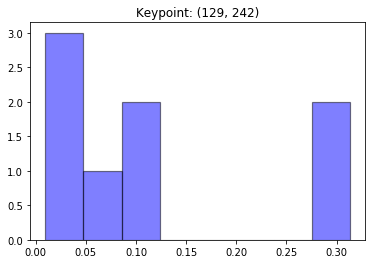

[0.31319737 0.08438744 0.11366676 0.31319737 0.09545059 0.0096299
 0.03541019 0.03506039]


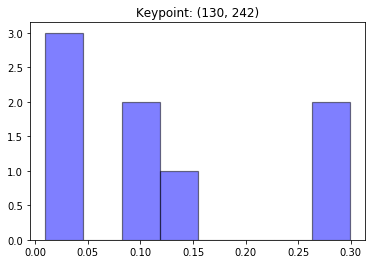

[0.29909719 0.08648752 0.11899008 0.29909719 0.1176838  0.00960171
 0.03530656 0.03373594]


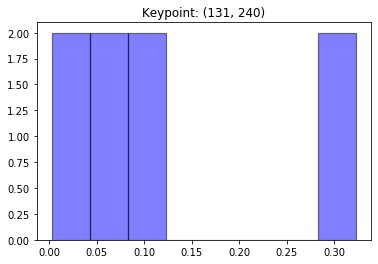

[0.32287649 0.08670561 0.07830345 0.32287649 0.10608816 0.00270664
 0.04475512 0.03568804]


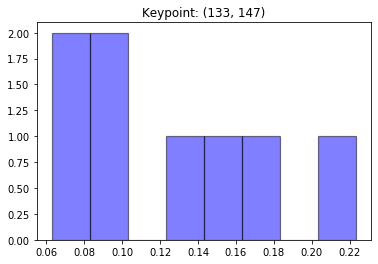

[0.0887885  0.13194679 0.09351359 0.17633045 0.22343238 0.14999167
 0.07318133 0.0628153 ]


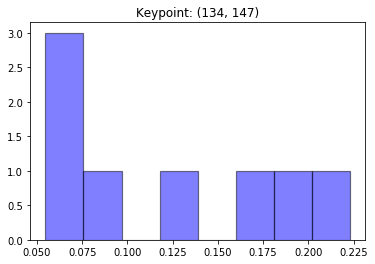

[0.08875212 0.12456978 0.07363036 0.19565581 0.22290052 0.1682622
 0.07156932 0.0546599 ]


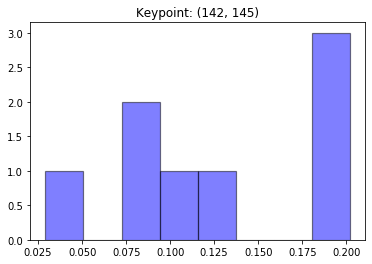

[0.08726923 0.09921976 0.18686574 0.20202508 0.19336871 0.07345895
 0.02915062 0.1286419 ]


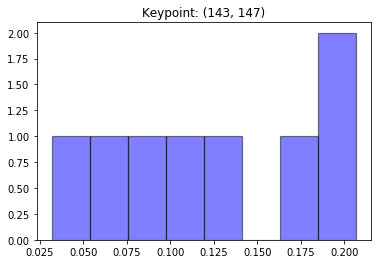

[0.08437434 0.13386108 0.18109298 0.18831394 0.20680735 0.06498779
 0.03188019 0.10868233]


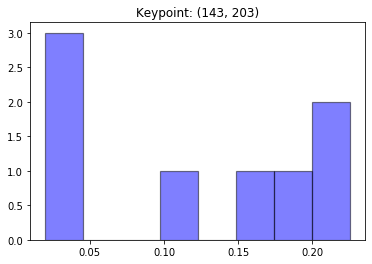

[0.12067818 0.22514015 0.17563261 0.22514015 0.16309536 0.02003229
 0.03789329 0.03238796]


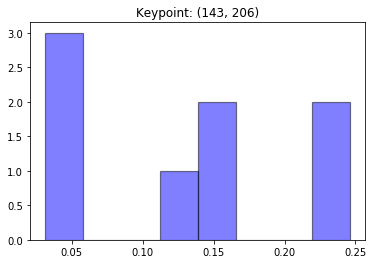

[0.11837119 0.24604468 0.146657   0.24604468 0.14182796 0.03136828
 0.03608874 0.03359748]


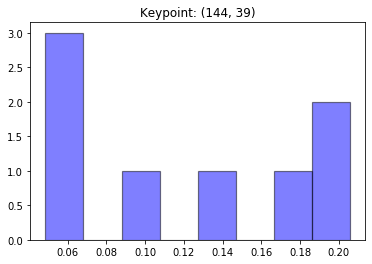

[0.17683607 0.20564135 0.2052047  0.09927013 0.05812326 0.04859244
 0.06464489 0.14168717]


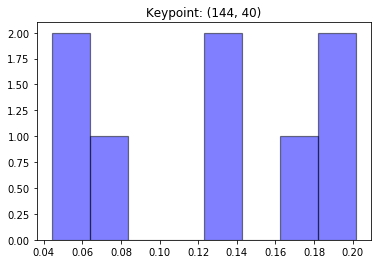

[0.17180819 0.2017442  0.19778109 0.12588082 0.04423551 0.04931276
 0.06695923 0.14227819]


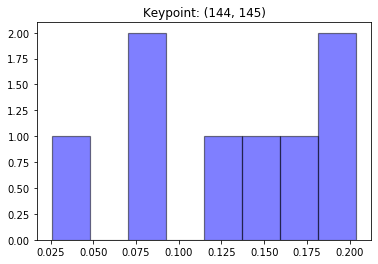

[0.08232762 0.16819699 0.20380447 0.18227419 0.13901381 0.07184744
 0.02572211 0.12681336]


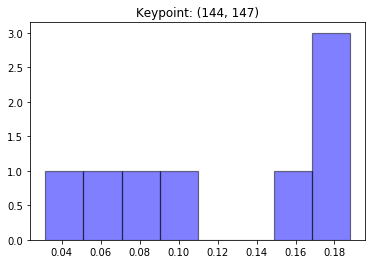

[0.08357579 0.17508715 0.18786555 0.18560739 0.16425923 0.06437272
 0.03157846 0.10765372]


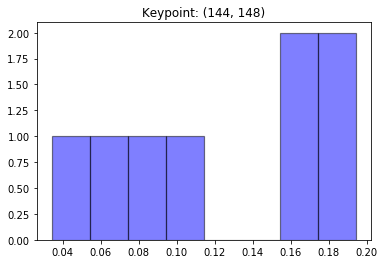

[0.090754   0.17652556 0.17334915 0.19442096 0.16012962 0.05817329
 0.0342907  0.11235672]


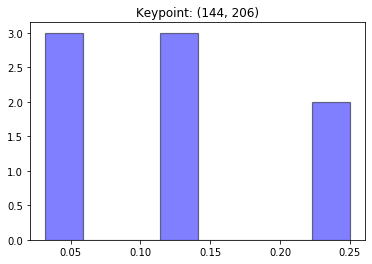

[0.11872509 0.24990666 0.13671947 0.24990666 0.13907498 0.03201474
 0.03822808 0.03542433]


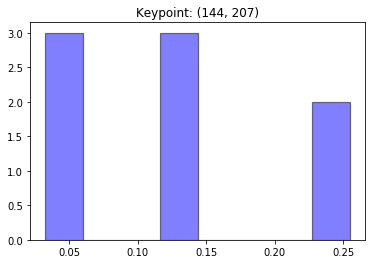

[0.1168635  0.25458895 0.12094245 0.25458895 0.14253537 0.0327791
 0.04080775 0.03689394]


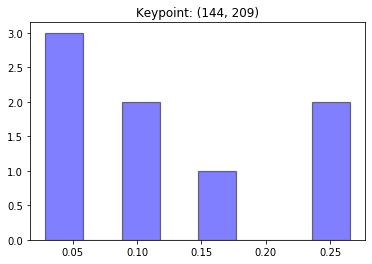

[0.10330025 0.26529131 0.11569839 0.26529131 0.14964067 0.03628384
 0.03574483 0.0287494 ]


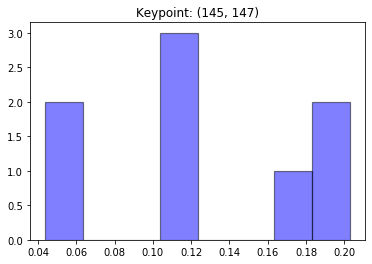

[0.12037525 0.19191903 0.20290235 0.16398224 0.11773736 0.04507754
 0.04381237 0.11419386]


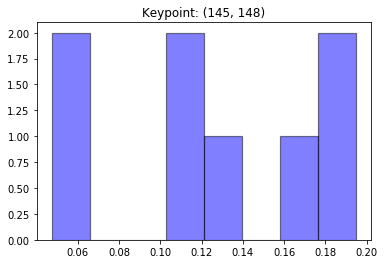

[0.13031367 0.19491828 0.18120211 0.17007003 0.10839419 0.04879923
 0.04742961 0.11887289]


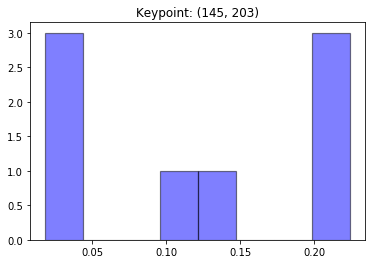

[0.11108401 0.22414137 0.2178953  0.22414137 0.1436367  0.01843515
 0.0338736  0.02679249]


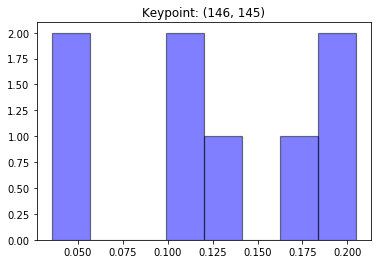

[0.12945278 0.19495736 0.2048879  0.17271043 0.11453563 0.04895942
 0.03539925 0.09909722]


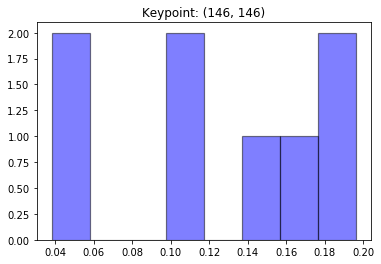

[0.13960475 0.19297278 0.19644711 0.16827531 0.10694062 0.05208531
 0.0382499  0.10542423]


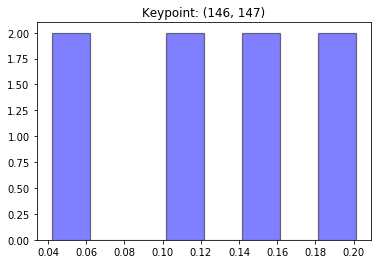

[0.14697696 0.20135781 0.1819737  0.15302017 0.11953235 0.04681342
 0.04203673 0.10828885]


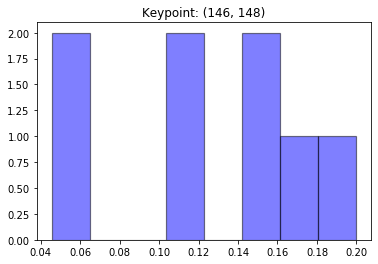

[0.15967002 0.19984711 0.16151762 0.15830279 0.11115646 0.05085627
 0.04566706 0.11298266]


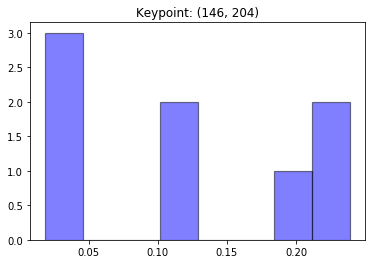

[0.12737979 0.23874074 0.19252133 0.23874074 0.1258888  0.01877129
 0.02910295 0.02885435]


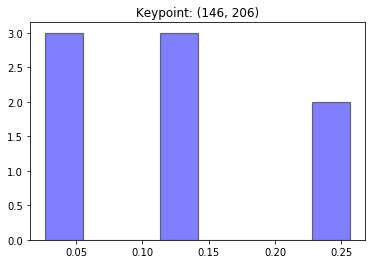

[0.13032857 0.25645041 0.14107258 0.25645041 0.12498241 0.02674601
 0.02779593 0.03617368]


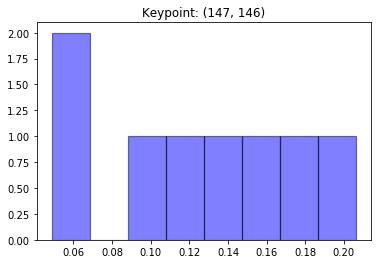

[0.1592574  0.20633671 0.17535595 0.13804379 0.10169906 0.05043983
 0.04876611 0.12010116]


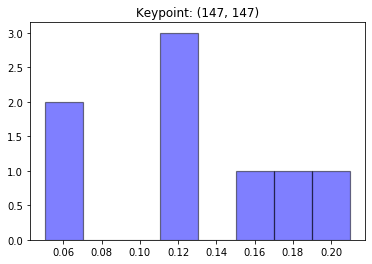

[0.17071241 0.20985338 0.16013645 0.12065566 0.11536743 0.0505431
 0.05432293 0.11840863]


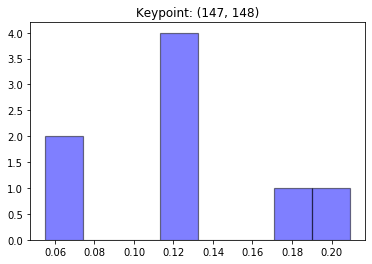

[0.18635901 0.20924514 0.12722801 0.1235486  0.11473767 0.05517562
 0.05930189 0.12440406]


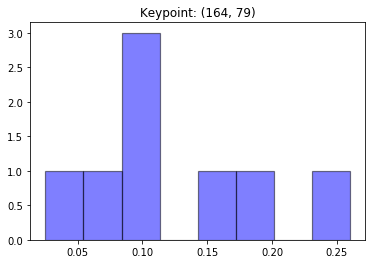

[0.1051716  0.15192442 0.17657521 0.09423284 0.11208425 0.26010753
 0.07481247 0.02509166]


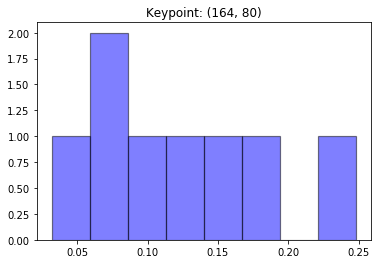

[0.10569056 0.14673745 0.17057253 0.07582709 0.13763714 0.24828958
 0.08330336 0.03194229]


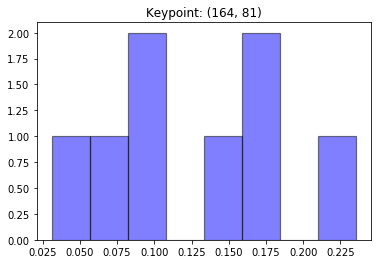

[0.10058046 0.14291354 0.16736773 0.0858228  0.16308083 0.23552308
 0.07355047 0.03116109]


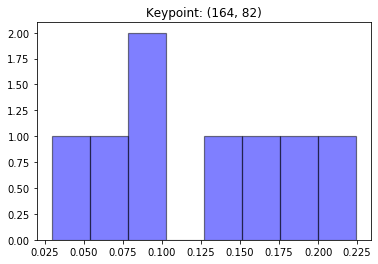

[0.10222618 0.14025781 0.19194462 0.09265993 0.15158301 0.22435082
 0.0673454  0.02963223]


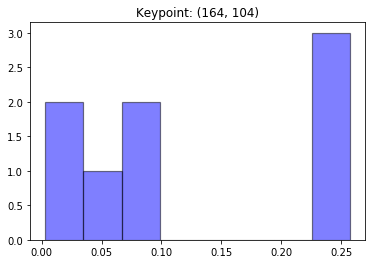

[0.02753408 0.04482803 0.09055159 0.25731837 0.25731837 0.25138355
 0.00316481 0.06790119]


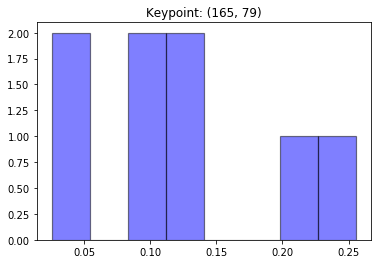

[0.09247196 0.14023333 0.22548547 0.09847384 0.11721653 0.25566345
 0.0447487  0.02570671]


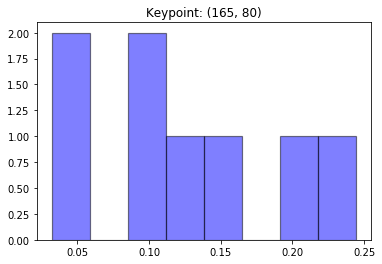

[0.09333719 0.13545671 0.21384919 0.09943737 0.1409397  0.24447497
 0.04038049 0.03212438]


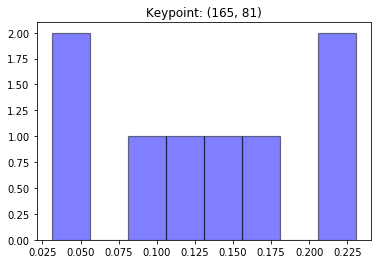

[0.08295734 0.13119237 0.207002   0.11978391 0.16368432 0.23077097
 0.03350786 0.03110124]


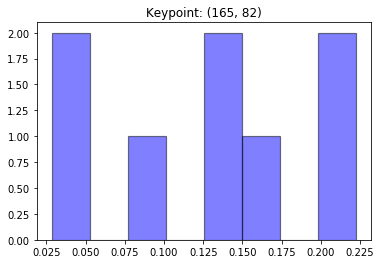

[0.08063711 0.13044184 0.22251824 0.12587736 0.15983806 0.22251824
 0.02976026 0.02840889]


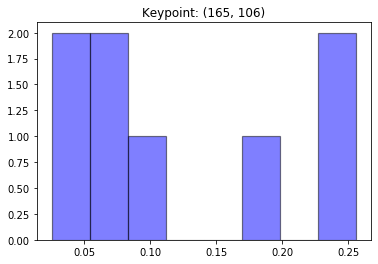

[0.03247705 0.06694687 0.09265343 0.25617374 0.19214756 0.25617374
 0.02549542 0.07793219]


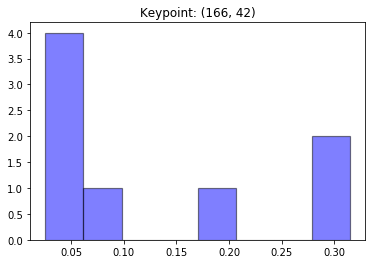

[0.31471368 0.06546392 0.17479148 0.31471368 0.03811867 0.02570868
 0.02650947 0.03998042]


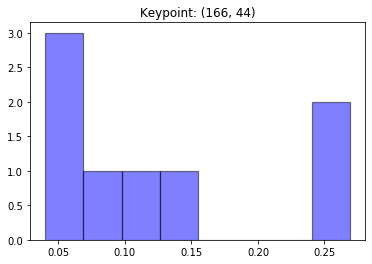

[0.26900842 0.06536132 0.12827471 0.26900842 0.10461424 0.07433238
 0.0402506  0.04914993]


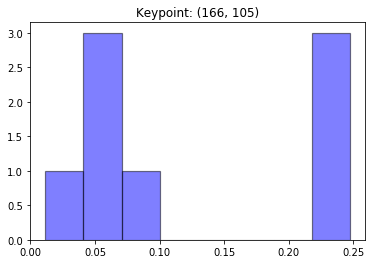

[0.0473598  0.05393682 0.07607998 0.24715229 0.24715229 0.24715229
 0.01162157 0.06954496]


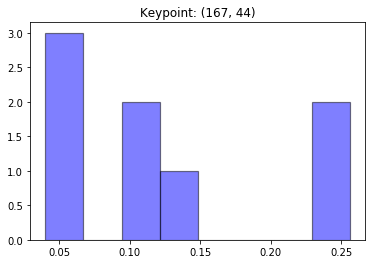

[0.25600088 0.05880038 0.12631211 0.25600088 0.10869745 0.098227
 0.04007667 0.05588462]


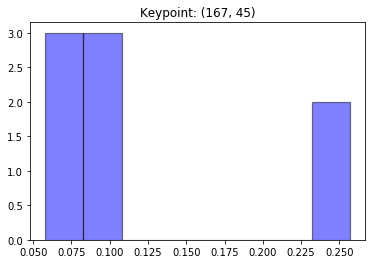

[0.25678446 0.05805622 0.08837901 0.25678446 0.10556876 0.10063947
 0.07549536 0.05829226]


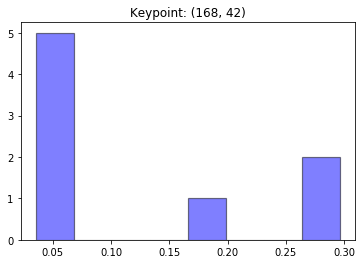

[0.29660629 0.06046756 0.17334541 0.29660629 0.03543524 0.05543729
 0.03735929 0.04474263]


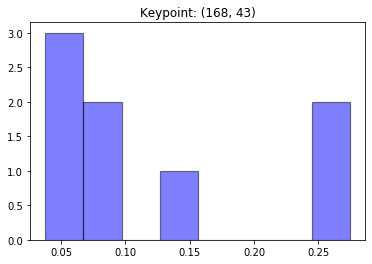

[0.27444463 0.06780072 0.14362969 0.27444463 0.06649919 0.09007807
 0.03774166 0.04536141]


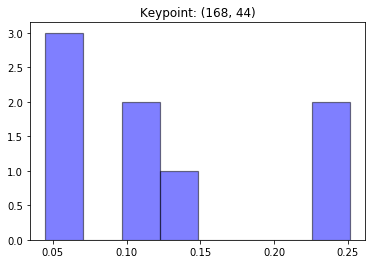

[0.25139337 0.05984788 0.12366727 0.25139337 0.11219997 0.10751257
 0.04897907 0.04500649]


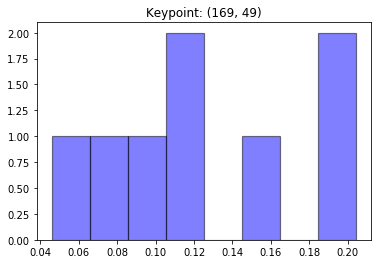

[0.20450975 0.04588661 0.0752929  0.15134568 0.20450975 0.12353124
 0.10595365 0.08897042]


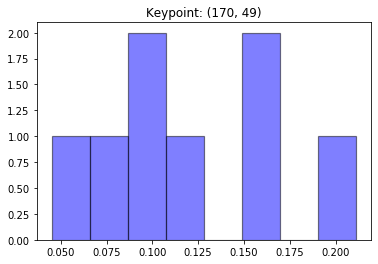

[0.1684053  0.04513937 0.08644855 0.16185915 0.21120506 0.12778876
 0.1009989  0.0981549 ]


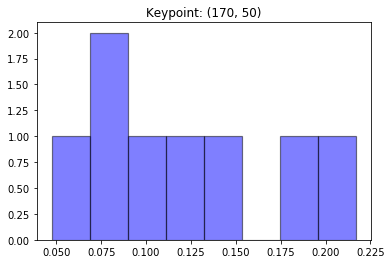

[0.12122873 0.04752095 0.08428189 0.19284516 0.21705135 0.14448652
 0.08925181 0.10333359]


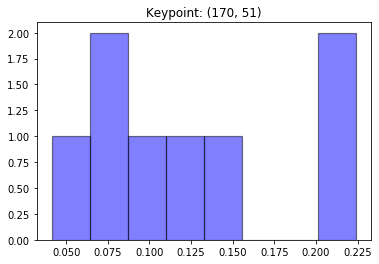

[0.12304218 0.04135745 0.07098476 0.22414761 0.22414761 0.14539837
 0.09058692 0.08033511]


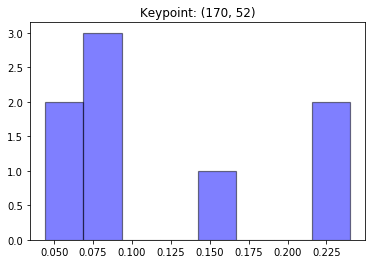

[0.07454723 0.04443377 0.0610795  0.23996405 0.23996405 0.15710813
 0.09066658 0.0922367 ]


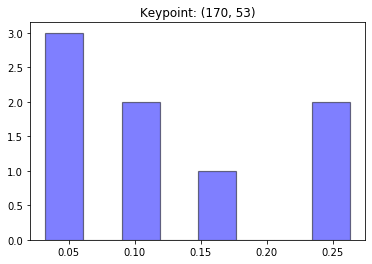

[0.03220748 0.03222245 0.03729156 0.26301526 0.26301526 0.17249185
 0.1020894  0.09766674]


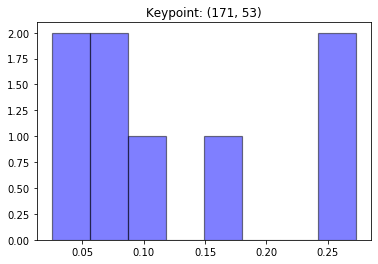

[0.03089431 0.02507019 0.06098923 0.27308441 0.27308441 0.15756801
 0.09467227 0.08463718]


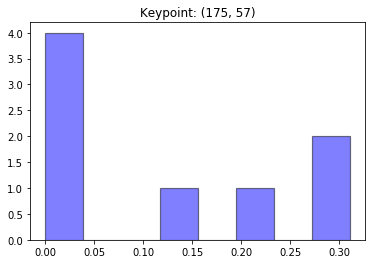

[0.         0.03086005 0.3110086  0.19567659 0.3110086  0.12204802
 0.00924193 0.02015622]


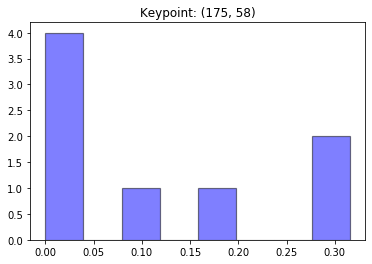

[0.         0.03335938 0.31561233 0.19614989 0.31561233 0.11554215
 0.00244761 0.02127631]


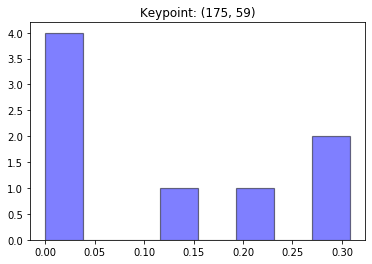

[0.         0.0361719  0.3079882  0.2123335  0.3079882  0.1215586
 0.00242768 0.01153193]


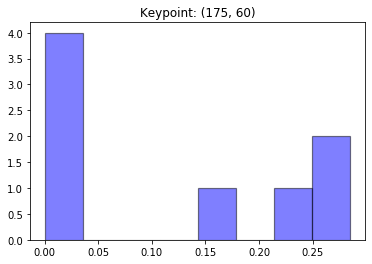

[0.00069515 0.03459727 0.28464508 0.22151484 0.28464508 0.15580891
 0.00247403 0.01561964]


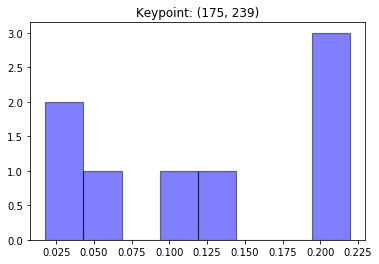

[0.21950554 0.21950554 0.12834955 0.03835663 0.01780516 0.06049709
 0.09647495 0.21950554]


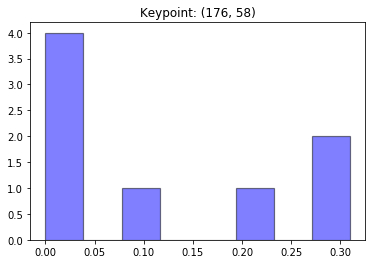

[0.         0.0382368  0.30951096 0.21487988 0.30951096 0.10057125
 0.00259484 0.0246953 ]


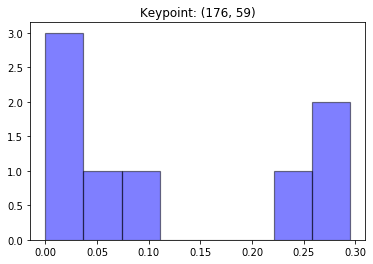

[0.         0.03943923 0.29475392 0.25229116 0.29475392 0.10256194
 0.002464   0.01373583]


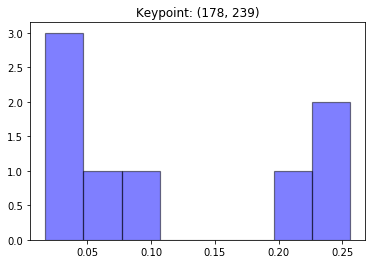

[0.22203336 0.25571694 0.10446643 0.04167254 0.01704038 0.04500728
 0.05834612 0.25571694]


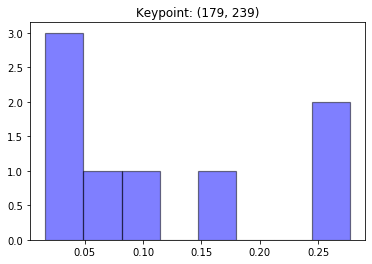

[0.16486527 0.27715686 0.108726   0.04650871 0.01643609 0.04786335
 0.06128686 0.27715686]


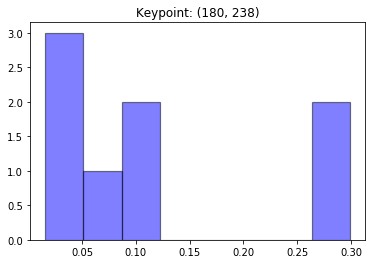

[0.12199395 0.29884664 0.10873325 0.04411139 0.01604375 0.04939012
 0.06203428 0.29884664]


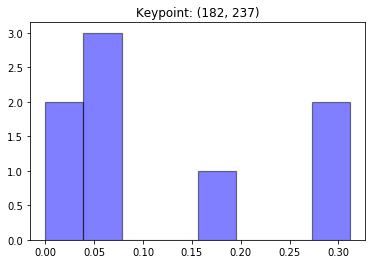

[0.16975614 0.31165045 0.07284518 0.03894309 0.         0.05376589
 0.04138879 0.31165045]


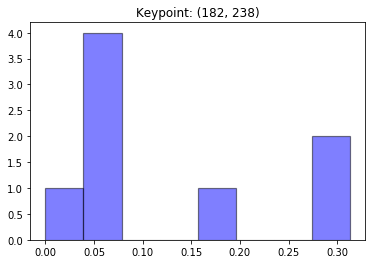

[0.16814356 0.31294642 0.07143954 0.04120552 0.         0.05272841
 0.04059014 0.31294642]


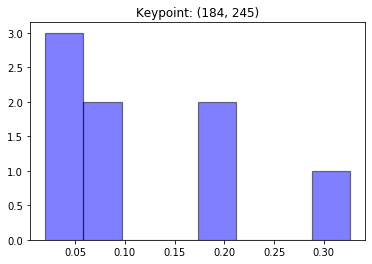

[0.19506085 0.32609936 0.20721927 0.09059711 0.03369112 0.02005891
 0.04295222 0.08432117]


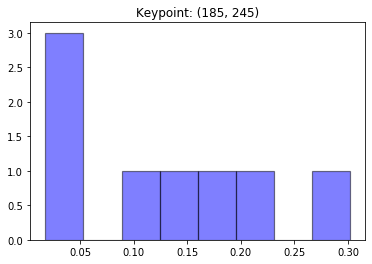

[0.20239014 0.30162581 0.18637092 0.09019371 0.03504415 0.01755145
 0.03849059 0.12833324]


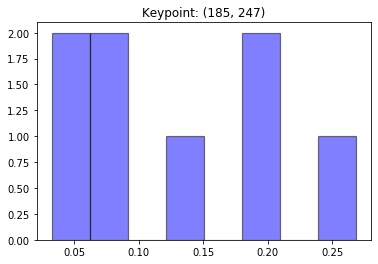

[0.20280372 0.26859875 0.18369935 0.08558255 0.03486278 0.03253934
 0.06424443 0.12766907]


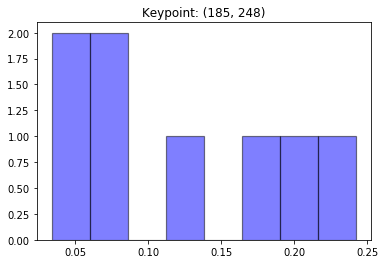

[0.1972063  0.24252993 0.16860669 0.08322045 0.03390056 0.05298575
 0.08478006 0.13677025]


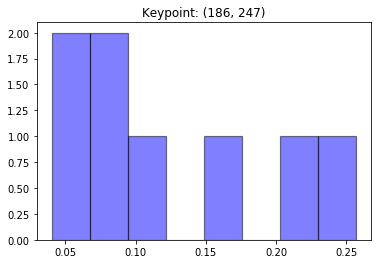

[0.20475415 0.25689269 0.16489225 0.08741661 0.04027689 0.04633059
 0.0843761  0.11506072]


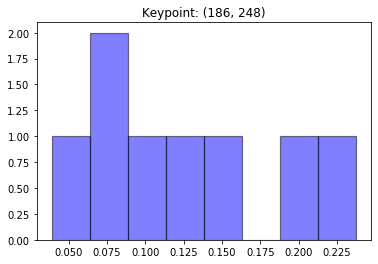

[0.19849441 0.23739759 0.15018715 0.08474411 0.03904555 0.06580788
 0.10143693 0.12288637]


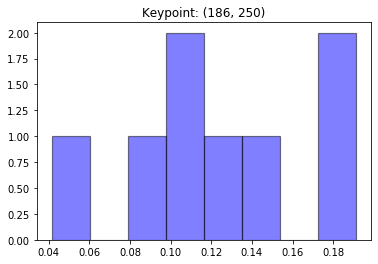

[0.17570746 0.19132765 0.11480481 0.08321893 0.04149127 0.11581398
 0.14275199 0.13488391]


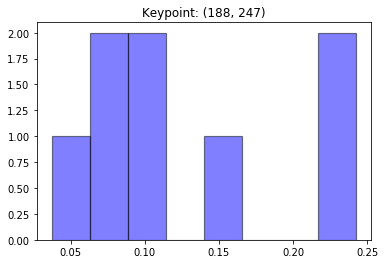

[0.21878349 0.24267343 0.15247427 0.07903911 0.03715746 0.06978209
 0.0890175  0.11107265]


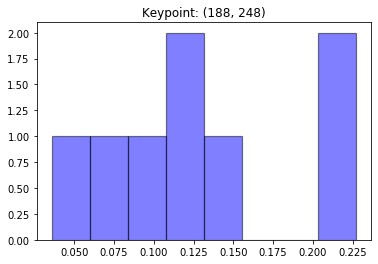

[0.21090122 0.22730045 0.13779709 0.07619151 0.03581876 0.08601948
 0.10919029 0.1167812 ]


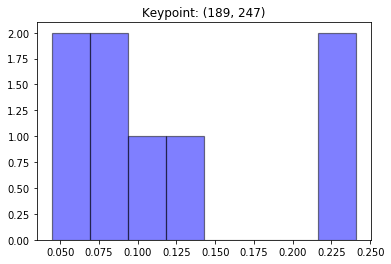

[0.2409484  0.2409484  0.12330709 0.06079358 0.04454968 0.08107048
 0.09231227 0.11607009]


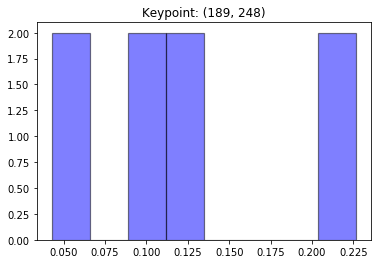

[0.226783   0.226783   0.10890483 0.05836965 0.04277341 0.09620175
 0.11871265 0.1214717 ]


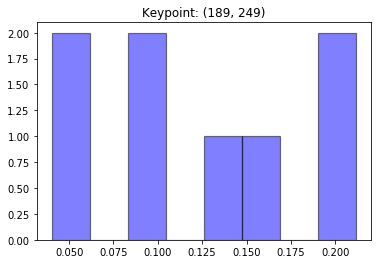

[0.21178262 0.21178262 0.09656734 0.05201459 0.04025897 0.09547521
 0.16426945 0.12784921]


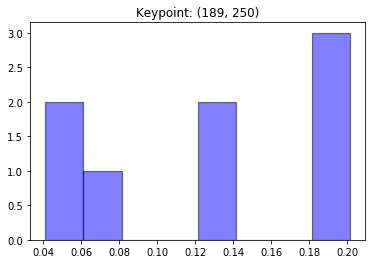

[0.19802197 0.20144635 0.06926558 0.0524949  0.04103588 0.13082375
 0.18449506 0.12241651]


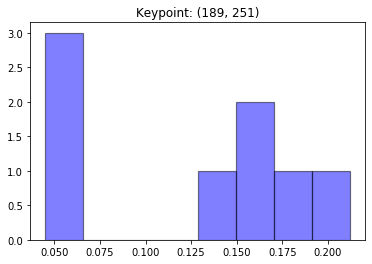

[0.1610458  0.17188577 0.05847485 0.05769497 0.04510084 0.1531053
 0.21197806 0.14071442]


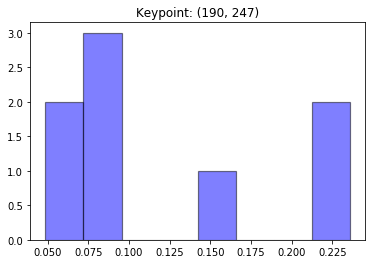

[0.2356526  0.2356526  0.08390857 0.05894355 0.04866939 0.08805388
 0.09455092 0.1545685 ]


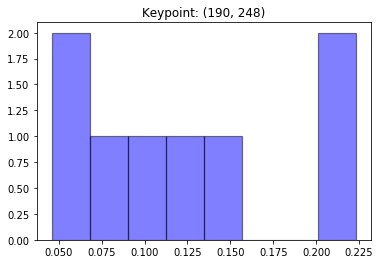

[0.22335444 0.22335444 0.06959034 0.05558943 0.04589992 0.10151861
 0.12482937 0.15586345]


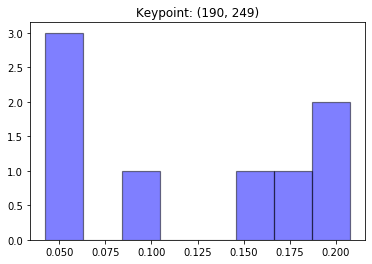

[0.20748516 0.20748516 0.05861258 0.05097221 0.04253741 0.09833493
 0.17731264 0.15725991]


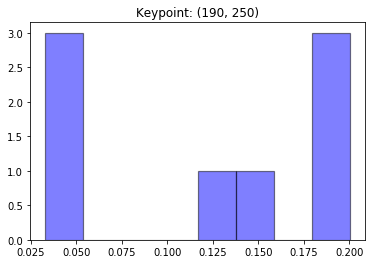

[0.19689196 0.19044091 0.03304013 0.05165951 0.04337079 0.13303874
 0.20023538 0.15132259]


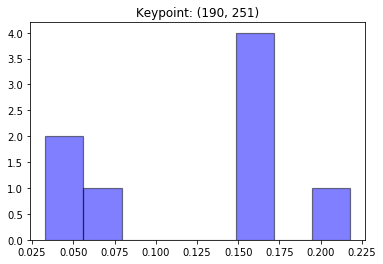

[0.16173153 0.15369493 0.03309849 0.05734582 0.04814474 0.15704474
 0.21763464 0.1713051 ]


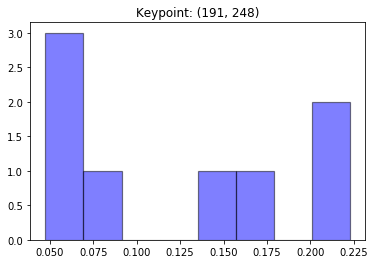

[0.22262494 0.22262494 0.05376867 0.05626455 0.04750364 0.09003427
 0.14084969 0.16632931]


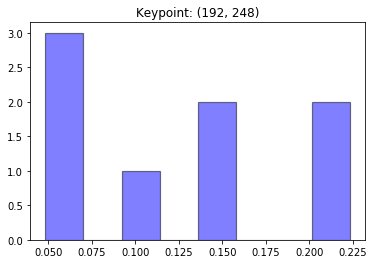

[0.2232496  0.2232496  0.06558512 0.0483772  0.04999582 0.09578212
 0.14905542 0.14470513]


In [36]:
imgn = imread('img/cardinal1.jpg')
newimg,keypoints_dict,PX,PY,RScore,Ix,Iy = extract_keypoints(imgn)
keypoint_hist = compute_features(keypoints_dict,PX,PY,RScore,Ix,Iy)
for kp in keypoint_hist:
    hist = keypoint_hist[kp]
    plt.hist(hist, 8, facecolor='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
    plt.title("Keypoint: "+"("+str(kp[0])+", "+str(kp[1])+")")
    plt.show()
    print(hist)

## Part VI: Image Description with SIFT Bag-of-Words

In [37]:
def computeBOWRepr(featureDictforBOW,means): 
    bowHist = np.zeros((means.shape[0]))
    bowHistNormalzied = np.zeros_like(bowHist)
    cluster = {}
    for i, (keyPt,valVec) in enumerate(featureDictforBOW.items()):
        minIndex = np.nan
        minVal = float("inf")
        sim = float("inf")
        
        for j in range(means.shape[0]):
            sim = distance.euclidean(means[j],valVec)
            if sim < minVal:
                minIndex = j
                minVal = sim

        if np.isnan(sim):
            print('feature is nan at index',i,keyPt)
            continue

        if not np.isnan(minIndex):
            if minIndex in cluster:
                cluster[minIndex] += 1
            else:
                cluster[minIndex] = 1
            bowHist[minIndex] = bowHist[minIndex] + 1
    bowHistNormalzied = bowHist.copy()/np.sum(bowHist)
    print("Total no. of features: ", len(featureDictforBOW))
    print("No. of features per cluster:")
    for clus in cluster:
        print("Cluster", clus, ":", cluster[clus])
    return bowHistNormalzied

Total no. of features:  105
No. of features per cluster:
Cluster 4 : 12
Cluster 8 : 2
Cluster 7 : 9
Cluster 6 : 6
Cluster 9 : 37
Cluster 5 : 15
Cluster 0 : 10
Cluster 1 : 7
Cluster 3 : 1
Cluster 2 : 6


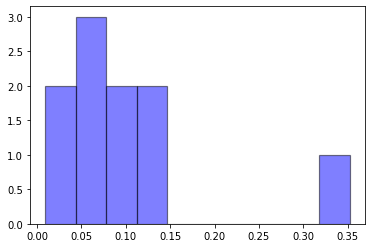

[0.0952381  0.06666667 0.05714286 0.00952381 0.11428571 0.14285714
 0.05714286 0.08571429 0.01904762 0.35238095]


In [38]:
meanFilterBank =  loadmat('means.mat')
meanfilter = meanFilterBank["means"]
featureDictforBOW = keypoint_hist.copy()

bow_repr = computeBOWRepr(featureDictforBOW,meanfilter)

plt.hist(bow_repr, len(bow_repr), facecolor='blue', alpha=0.5, edgecolor='black', linewidth=1.2)
plt.show()
print(bow_repr)

## Part VII: Comparison of Image Descriptions

In [39]:
cardinal1 = imread('img/cardinal1.jpg')
cardinal2 = imread('img/cardinal2.jpg')
leopard1 = imread('img/leopard1.jpg')
leopard2 = imread('img/leopard2.jpg')
panda1 = imread('img/panda1.jpg')
panda2 = imread('img/panda2.jpg')


cardinal1 = imresize(cardinal1, (100, 100))
cardinal2 = imresize(cardinal2, (100, 100))
leopard1 = imresize(leopard1, (100, 100))
leopard2 = imresize(leopard2, (100, 100))
panda1 = imresize(panda1, (100, 100))
panda2 = imresize(panda2, (100, 100))

C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize

In [40]:
def getAllRepresentation(image):    
    lmFilterBank =  loadmat('filters.mat')
    lmFilter = lmFilterBank["F"]
    meanFilterBank =  loadmat('means.mat')
    meanfilter = meanFilterBank["means"]
    
    texture_repr_concat,texture_repr_mean = computeTextureReprs(image,lmFilter)
    newimg,keypoints_dict,PX,PY,RScore,Ix,Iy = extract_keypoints(image)
    feature_dict = compute_features(keypoints_dict,PX,PY,RScore,Ix,Iy)
    bow_repr = computeBOWRepr(feature_dict,meanfilter)
    
    return bow_repr,texture_repr_concat,texture_repr_mean

In [41]:
cardinal1_BowHist,cardinal1_reprCon,cardinal1_reprMean=getAllRepresentation(cardinal1)
cardinal2_BowHist,cardinal2_reprCon,cardinal2_reprMean=getAllRepresentation(cardinal2)
leopard1_BowHist,leopard1_reprCon,leopard1_reprMean=getAllRepresentation(leopard1)
leopard2_BowHist,leopard2_reprCon,leopard2_reprMean=getAllRepresentation(leopard2)
panda1_BowHist,panda1_reprCon,panda1_reprMean=getAllRepresentation(panda1)
panda2_BowHist,panda2_reprCon,panda2_reprMean=getAllRepresentation(panda2)

Total no. of features:  18
No. of features per cluster:
Cluster 5 : 5
Cluster 3 : 4
Cluster 1 : 3
Cluster 6 : 4
Cluster 7 : 1
Cluster 2 : 1
Total no. of features:  6
No. of features per cluster:
Cluster 6 : 3
Cluster 8 : 3


C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Total no. of features:  62
No. of features per cluster:
Cluster 3 : 1
Cluster 2 : 3
Cluster 4 : 17
Cluster 0 : 29
Cluster 7 : 5
Cluster 9 : 7
Total no. of features:  425
No. of features per cluster:
Cluster 5 : 37
Cluster 0 : 60
Cluster 2 : 32
Cluster 4 : 122
Cluster 7 : 100
Cluster 9 : 40
Cluster 8 : 5
Cluster 6 : 29
Total no. of features:  25
No. of features per cluster:
Cluster 2 : 4
Cluster 4 : 8
Cluster 0 : 6
Cluster 3 : 7
Total no. of features:  51
No. of features per cluster:
Cluster 3 : 4
Cluster 0 : 12
Cluster 9 : 12
Cluster 5 : 3
Cluster 8 : 5
Cluster 4 : 15


C:\Users\debda\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


In [42]:
similarDist = np.zeros(3)
AwayDist = np.zeros(12)
#0 cardinal
#1 leopard
#2 panda

In [43]:
print('Within class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector')
similarDist[0] = np.linalg.norm(cardinal1_BowHist-cardinal2_BowHist)
similarDist[1] = np.linalg.norm(leopard1_BowHist-leopard2_BowHist)
similarDist[2] = np.linalg.norm(panda1_BowHist-panda2_BowHist)
print('similarDist',similarDist)
print(np.mean(similarDist))

Within class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector
similarDist [0.6983225  0.38004941 0.36790919]
0.4820936998450067


In [44]:
# similarDist[0] = np.linalg.norm(cardinal1_BowHist-cardinal2_BowHist)
print('Within class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector')
similarDist[0] = distance.euclidean(cardinal1_BowHist,cardinal2_BowHist)
similarDist[1] = distance.euclidean(leopard1_BowHist,leopard2_BowHist)
similarDist[2] = distance.euclidean(panda1_BowHist,panda2_BowHist)
print('similarDist',similarDist)
print(np.mean(similarDist))

Within class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector
similarDist [0.6983225  0.38004941 0.36790919]
0.4820936998450067


In [45]:
print('similarDist vector is ',similarDist)
print('mean of similar classes',np.mean(similarDist))

similarDist vector is  [0.6983225  0.38004941 0.36790919]
mean of similar classes 0.4820936998450067


In [46]:
print('Between class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector')
AwayDist[0] = np.linalg.norm(cardinal1_BowHist-leopard1_BowHist)
AwayDist[1] = np.linalg.norm(cardinal1_BowHist-panda1_BowHist)
AwayDist[2] = np.linalg.norm(leopard1_BowHist-cardinal1_BowHist)
AwayDist[3] = np.linalg.norm(leopard1_BowHist-panda1_BowHist)
AwayDist[4] = np.linalg.norm(panda1_BowHist-cardinal1_BowHist)
AwayDist[5] = np.linalg.norm(panda1_BowHist-leopard1_BowHist)
AwayDist[6] = np.linalg.norm(cardinal2_BowHist-leopard2_BowHist)
AwayDist[7] = np.linalg.norm(cardinal2_BowHist-panda2_BowHist)
AwayDist[8] = np.linalg.norm(leopard2_BowHist-cardinal2_BowHist)
AwayDist[9] = np.linalg.norm(leopard2_BowHist-panda2_BowHist)
AwayDist[10] = np.linalg.norm(panda2_BowHist-cardinal2_BowHist)
AwayDist[11] = np.linalg.norm(panda2_BowHist-leopard2_BowHist)

print('AwayDist',AwayDist)
print(np.mean(AwayDist))

Between class distance histogram representation of  Features and descriptor comparision using SIFT and Harris corner detector
AwayDist [0.71006199 0.57589437 0.71006199 0.39408213 0.57589437 0.39408213
 0.77755895 0.7863943  0.77755895 0.3300293  0.7863943  0.3300293 ]
0.5956701729222273


In [47]:
print('The Ratio of Bag of words representation = ',np.mean(similarDist)/np.mean(AwayDist))

The Ratio of Bag of words representation =  0.8093299308238998


In [48]:
cardinal1_reprMean = np.asarray(cardinal1_reprMean)
cardinal2_reprMean = np.asarray(cardinal2_reprMean)
leopard1_reprMean = np.asarray(leopard1_reprMean)
leopard2_reprMean = np.asarray(leopard2_reprMean)
panda1_reprMean = np.asarray(panda1_reprMean)
panda2_reprMean = np.asarray(panda2_reprMean)

In [49]:
meanSimilarDist = np.zeros(3)
meanSimilarDist[0] = np.linalg.norm(cardinal1_reprMean-cardinal2_reprMean)
meanSimilarDist[1] = np.linalg.norm(leopard1_reprMean-leopard2_reprMean)
meanSimilarDist[2] = np.linalg.norm(panda1_reprMean-panda2_reprMean)

print(meanSimilarDist)
print(np.mean(meanSimilarDist))

[0.02013645 0.02019027 0.02104119]
0.020455973858388637


In [50]:
meanAwayDist = np.zeros(12)
meanAwayDist[0] = np.linalg.norm(cardinal1_reprMean-leopard1_reprMean)
meanAwayDist[1] = np.linalg.norm(cardinal2_reprMean-panda1_reprMean)
meanAwayDist[2] = np.linalg.norm(leopard1_reprMean-cardinal1_reprMean)
meanAwayDist[3] = np.linalg.norm(leopard2_reprMean-panda1_reprMean)
meanAwayDist[4] = np.linalg.norm(panda1_reprMean-cardinal1_reprMean)
meanAwayDist[5] = np.linalg.norm(panda2_reprMean-leopard1_reprMean)
meanAwayDist[6] = np.linalg.norm(cardinal1_BowHist-leopard2_BowHist)
meanAwayDist[7] = np.linalg.norm(cardinal2_BowHist-panda2_BowHist)
meanAwayDist[8] = np.linalg.norm(leopard1_BowHist-cardinal2_BowHist)
meanAwayDist[9] = np.linalg.norm(leopard2_BowHist-panda2_BowHist)
meanAwayDist[10] = np.linalg.norm(panda1_BowHist-cardinal2_BowHist)
meanAwayDist[11] = np.linalg.norm(panda2_BowHist-leopard2_BowHist)

print(meanAwayDist)
print(np.mean(meanAwayDist))

[0.03347488 0.01171772 0.03347488 0.0281303  0.02797872 0.02879658
 0.53035069 0.7863943  0.90322581 0.3300293  0.87407094 0.3300293 ]
0.3264727845807959


In [51]:
print('The Ratio of Texture represenatation Mean = ',(np.mean(meanSimilarDist)/np.mean(meanAwayDist)))

The Ratio of Texture represenatation Mean =  0.06265751641336635


In [52]:
ConSimilarDist = np.zeros(3)
ConSimilarDist[0] = np.linalg.norm(cardinal1_reprCon-cardinal2_reprCon)
ConSimilarDist[1] = np.linalg.norm(leopard1_reprCon-leopard2_reprCon)
ConSimilarDist[2] = np.linalg.norm(panda1_reprCon-panda2_reprCon)

print(ConSimilarDist)
print(np.mean(ConSimilarDist))

[32.94266502 32.06114945 54.45975475]
39.82118973895445


In [53]:
ConAwayDist = np.zeros(12)
ConAwayDist[0] = np.linalg.norm(cardinal1_reprCon-leopard1_reprCon)
ConAwayDist[1] = np.linalg.norm(cardinal2_reprCon-panda1_reprCon)
ConAwayDist[2] = np.linalg.norm(leopard1_reprCon-cardinal1_reprCon)
ConAwayDist[3] = np.linalg.norm(leopard2_reprCon-panda1_reprCon)
ConAwayDist[4] = np.linalg.norm(panda1_reprCon-cardinal1_reprCon)
ConAwayDist[5] = np.linalg.norm(panda2_reprCon-leopard1_reprCon)


ConAwayDist[6] = np.linalg.norm(cardinal1_reprCon-leopard2_reprCon)
ConAwayDist[7] = np.linalg.norm(cardinal2_reprCon-panda2_reprCon)
ConAwayDist[8] = np.linalg.norm(leopard1_reprCon-cardinal2_reprCon)
ConAwayDist[9] = np.linalg.norm(leopard2_reprCon-panda2_reprCon)
ConAwayDist[10] = np.linalg.norm(panda1_reprCon-cardinal2_reprCon)
ConAwayDist[11] = np.linalg.norm(panda2_reprCon-leopard2_reprCon)


print(ConAwayDist)
print(np.mean(ConAwayDist))

[36.75486628 49.70224565 36.75486628 45.24811981 45.10886081 45.64585176
 35.93190889 42.19426865 32.48159054 45.74270027 49.70224565 45.74270027]
42.58418540350983


In [54]:
print('The Ratio of Texture represenatation Concat = ',(np.mean(ConSimilarDist)/np.mean(ConAwayDist)))

The Ratio of Texture represenatation Concat =  0.935116859971034


#### For which of the three representations is the within-between ratio smallest? Is this what you expected? Why or why not? Which of the three types of descriptors that you used is the best one? How can you tell?

* The Ratio of Texture Mean represenatation has the smallest ratio on within class and between class.
* I have expected Bag of words to be the best over other descriptors.
* Because the Bag of words with SIFT descriptor performs the best in texture represenatation.
* But it comes to conclusion that Texture Mean Representation has the lowest ratio between images of same class to images of different class, so it is the best descriptors.